# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [15]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [17]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [18]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

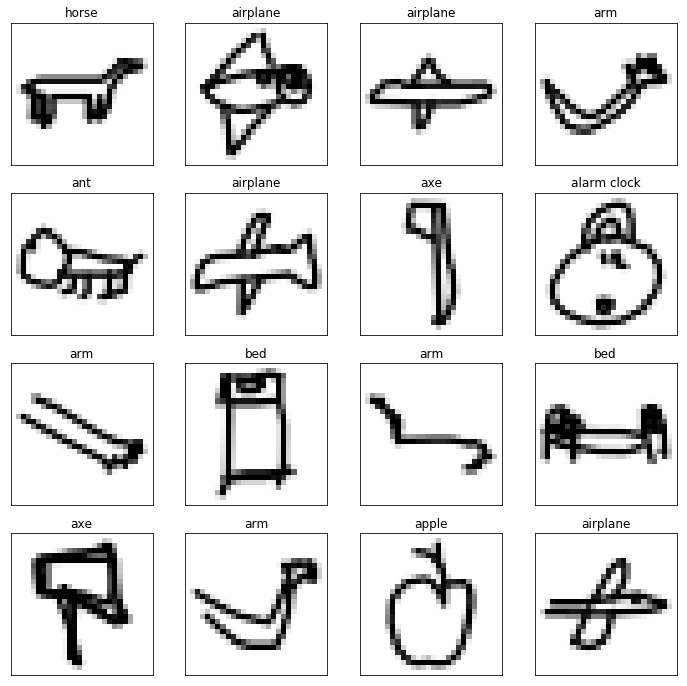

In [19]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [20]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

**WARNING**: This cell will take a significantly long time to run

In [21]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 6s 63us/step - loss: 1.5242 - accuracy: 0.4999
Epoch 2/500
100000/100000 [==============================] - 6s 59us/step - loss: 1.0654 - accuracy: 0.6252
Epoch 3/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.0062 - accuracy: 0.6460
Epoch 4/500
100000/100000 [==============================] - 6s 57us/step - loss: 0.9864 - accuracy: 0.6546
Epoch 5/500
100000/100000 [==============================] - 6s 56us/step - loss: 0.9834 - accuracy: 0.6567
Epoch 6/500
100000/100000 [==============================] - 6s 63us/step - loss: 0.9940 - accuracy: 0.6545
Epoch 7/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.0152 - accuracy: 0.6481
Epoch 8/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.0533 - accuracy: 0.6420
Epoch 9/500
100000/100000 [==============================] - 6s 61us/step - loss: 1.1173 - accuracy: 0.6072
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 11s 108us/step - loss: 2.1695 - accuracy: 0.1661
Epoch 77/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.1959 - accuracy: 0.1572
Epoch 78/500
100000/100000 [==============================] - 10s 99us/step - loss: 2.2325 - accuracy: 0.1486
Epoch 79/500
100000/100000 [==============================] - 10s 97us/step - loss: 2.2379 - accuracy: 0.1571
Epoch 80/500
100000/100000 [==============================] - 9s 95us/step - loss: 2.1945 - accuracy: 0.1601
Epoch 81/500
100000/100000 [==============================] - 10s 97us/step - loss: 2.2117 - accuracy: 0.1626
Epoch 82/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.2127 - accuracy: 0.1586
Epoch 83/500
100000/100000 [==============================] - 11s 105us/step - loss: 2.1886 - accuracy: 0.1621
Epoch 84/500
100000/100000 [==============================] - 11s 110us/step - loss: 2.1850 - accuracy: 0.1620
Epoch 85/500
100000

100000/100000 [==============================] - 9s 91us/step - loss: 2.1688 - accuracy: 0.1766
Epoch 150/500
100000/100000 [==============================] - 9s 92us/step - loss: 2.2025 - accuracy: 0.1813
Epoch 151/500
100000/100000 [==============================] - 10s 96us/step - loss: 2.1829 - accuracy: 0.1763
Epoch 152/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.1716 - accuracy: 0.1786
Epoch 153/500
100000/100000 [==============================] - 10s 96us/step - loss: 2.1707 - accuracy: 0.1780
Epoch 154/500
100000/100000 [==============================] - 9s 93us/step - loss: 2.1964 - accuracy: 0.1763
Epoch 155/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.1716 - accuracy: 0.1826
Epoch 156/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.1783 - accuracy: 0.1825
Epoch 157/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.1584 - accuracy: 0.1799
Epoch 158/500
100000

100000/100000 [==============================] - 10s 99us/step - loss: 2.1386 - accuracy: 0.1766
Epoch 224/500
100000/100000 [==============================] - 9s 94us/step - loss: 2.1237 - accuracy: 0.1802
Epoch 225/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.1212 - accuracy: 0.1847
Epoch 226/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.1210 - accuracy: 0.1829
Epoch 227/500
100000/100000 [==============================] - 9s 92us/step - loss: 2.1102 - accuracy: 0.1848
Epoch 228/500
100000/100000 [==============================] - 9s 94us/step - loss: 2.1230 - accuracy: 0.1801
Epoch 229/500
100000/100000 [==============================] - 9s 94us/step - loss: 2.1168 - accuracy: 0.1801
Epoch 230/500
100000/100000 [==============================] - 9s 94us/step - loss: 2.1026 - accuracy: 0.1822
Epoch 231/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.0918 - accuracy: 0.1880
Epoch 232/500
100000/10

100000/100000 [==============================] - 9s 94us/step - loss: 2.0509 - accuracy: 0.1971
Epoch 297/500
100000/100000 [==============================] - 9s 93us/step - loss: 2.0549 - accuracy: 0.1968
Epoch 298/500
100000/100000 [==============================] - 9s 94us/step - loss: 2.0497 - accuracy: 0.1966
Epoch 299/500
100000/100000 [==============================] - 9s 95us/step - loss: 2.0508 - accuracy: 0.1976
Epoch 300/500
100000/100000 [==============================] - 9s 92us/step - loss: 2.0473 - accuracy: 0.1957
Epoch 301/500
100000/100000 [==============================] - 9s 92us/step - loss: 2.0335 - accuracy: 0.2005
Epoch 302/500
100000/100000 [==============================] - 9s 95us/step - loss: 2.0351 - accuracy: 0.1998
Epoch 303/500
100000/100000 [==============================] - 10s 96us/step - loss: 2.0322 - accuracy: 0.1979
Epoch 304/500
100000/100000 [==============================] - 10s 95us/step - loss: 2.0473 - accuracy: 0.1986
Epoch 305/500
100000/1

100000/100000 [==============================] - 9s 92us/step - loss: 2.2448 - accuracy: 0.1260
Epoch 371/500
100000/100000 [==============================] - 9s 92us/step - loss: 2.2504 - accuracy: 0.1264
Epoch 372/500
100000/100000 [==============================] - 9s 93us/step - loss: 2.2465 - accuracy: 0.1240
Epoch 373/500
100000/100000 [==============================] - 10s 97us/step - loss: 2.2570 - accuracy: 0.1255
Epoch 374/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.2433 - accuracy: 0.1261
Epoch 375/500
100000/100000 [==============================] - 10s 99us/step - loss: 2.2436 - accuracy: 0.1276
Epoch 376/500
100000/100000 [==============================] - 10s 95us/step - loss: 2.2431 - accuracy: 0.1262
Epoch 377/500
100000/100000 [==============================] - 9s 91us/step - loss: 2.2600 - accuracy: 0.1191
Epoch 378/500
100000/100000 [==============================] - 9s 89us/step - loss: 2.2562 - accuracy: 0.1251
Epoch 379/500
10000

100000/100000 [==============================] - 11s 107us/step - loss: 2.2237 - accuracy: 0.1376
Epoch 444/500
100000/100000 [==============================] - 11s 112us/step - loss: 2.2180 - accuracy: 0.1615
Epoch 445/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.1724 - accuracy: 0.1794
Epoch 446/500
100000/100000 [==============================] - 10s 100us/step - loss: 2.3064 - accuracy: 0.1611
Epoch 447/500
100000/100000 [==============================] - 11s 106us/step - loss: 2.2120 - accuracy: 0.1678
Epoch 448/500
100000/100000 [==============================] - 10s 103us/step - loss: 2.2280 - accuracy: 0.1539
Epoch 449/500
100000/100000 [==============================] - 10s 98us/step - loss: 2.1815 - accuracy: 0.1779
Epoch 450/500
100000/100000 [==============================] - 10s 105us/step - loss: 2.1812 - accuracy: 0.1787
Epoch 451/500
100000/100000 [==============================] - 10s 96us/step - loss: 2.2176 - accuracy: 0.1637
Epoch 45

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')